In [1]:
#-- import modules--

import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import math
import astropy_healpix as ah
from astropy import units as u
import healpy as hp
import ligo.skymap.plot           
from ligo.skymap.tool import ArgumentParser, FileType
from ligo.skymap.io import fits
from ligo.skymap.tool import ligo_skymap_contour
from ligo.skymap.postprocess import contour
from ligo.skymap import postprocess
from astropy.coordinates import SkyCoord
from astropy.time import Time
import scipy.stats as st
from scipy.optimize import bisect
from tqdm import tqdm

from ligo.skymap import io
from ligo.skymap.bayestar import rasterize
from ligo.skymap import version
from astropy.table import Table
from astropy.time import Time
import numpy as np
import os
import sys
import pickle
from ligo.skymap.kde import Clustered2Plus1DSkyKDE, Clustered2DSkyKDE
import logging
from textwrap import wrap
from pycbc.detector import Detector

In [2]:
#-- detector networks of interest --

five_ifos = ['L1', 'H1', 'V1', 'K1', 'A0']
four_ifos = ['L1', 'H1', 'V1', 'K1']

## $\Rightarrow$ For A0 at O4

In [3]:
base_path = os.getcwd() + '/../../../'

In [4]:
event_O4 = np.loadtxt(base_path+'PE_Network_A0_O4/detection_criteria_bns/injections_{}_O4_SNR_20_to_25.txt'.format("".join(five_ifos)))
    
snr_a0_O4 = event_O4[:, 9]

sub_a0_O4_idx = np.where(snr_a0_O4 < 6)[0]

print(len(sub_a0_O4_idx))

191


In [5]:
ra, dec = event_O4[71][0:2]
ra_ha, dec_deg = 6.78, dec*180/np.pi

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 191/191 [23:54<00:00,  7.51s/it]


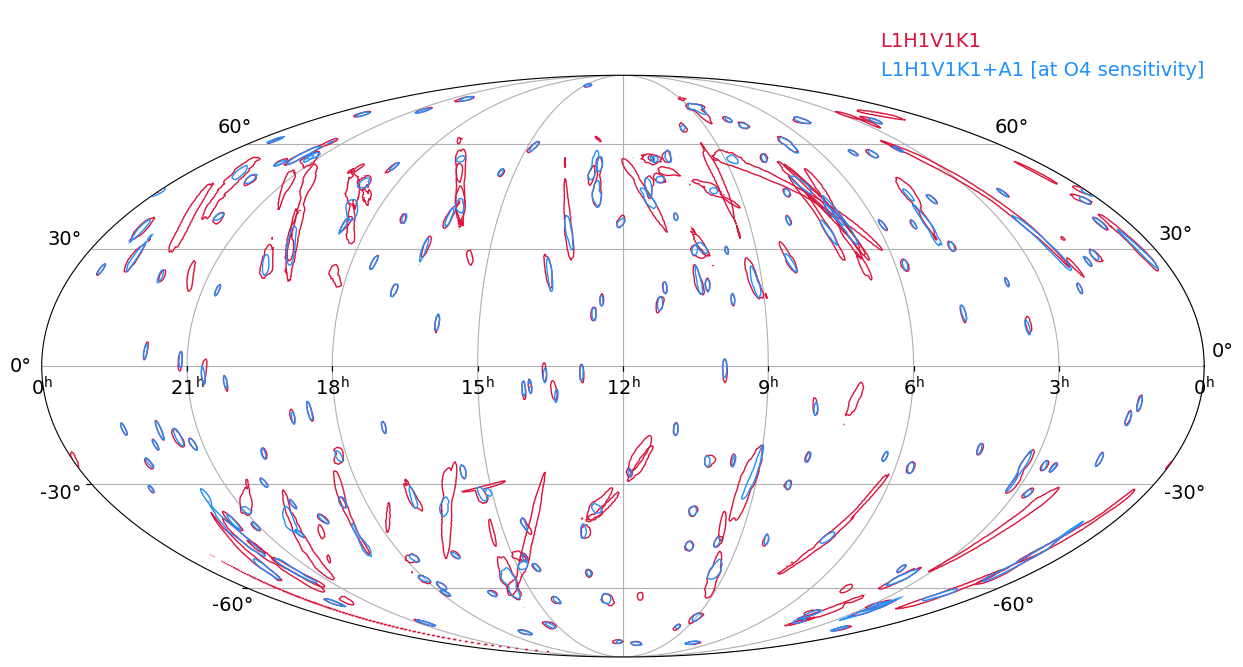

In [6]:
#-- ASTRO MOLLWEIDE PROJECTION --

plt.figure(figsize=(15,8))
fontsize = 14

#-- plotting arguments ----
axes_args = {}
axes_args['projection'] = 'astro hours'
axes_args['projection'] += ' ' + 'mollweide'

ax = plt.axes(**axes_args)
ax.grid()
ax.tick_params(which='both', labelsize=fontsize)

colors = ['dodgerblue', 'crimson']

#-- for LHVK -- (for  reference)
skymap_0 = {}
metadata_0 = {}
nside_0 = {}
text_0 = {}
vals_0 = {}
cs_0 = {}
deg2perpix_0 = {}
probperdeg_0 = {}

#-- for LHVKA --
skymap = {}
metadata = {}
nside = {}
text = {}
vals = {}
cs = {}
deg2perpix = {}
probperdeg = {}


levels = [90] # credible levels
pp = np.round([levels[0]])#.astype(int)
lw = 1.5

for idx in tqdm(sub_a0_O4_idx):
 
    skymap_0[idx], metadata_0[idx] =  fits.read_sky_map(os.getcwd() + '/LHVK_fits_files/injection_{}_skymap.fits.gz'.format(idx), nest=None)
    nside_0[idx] = ah.npix_to_nside(len(skymap_0[idx]))
    
    #--Convert sky map from probability to probability per square degree ---
    deg2perpix_0[idx] = ah.nside_to_pixel_area(nside_0[idx]).to_value(u.deg**2)
    probperdeg_0[idx] = skymap_0[idx] / deg2perpix_0[idx]
    
    vals_0[idx] = 100 * postprocess.find_greedy_credible_levels(skymap_0[idx])
    cs_0[idx] = ax.contour_hpx((vals_0[idx], 'ICRS'), nested=metadata_0[idx]['nest'], colors=colors[1], linewidths=1, levels=levels)


for idx in tqdm(sub_a0_O4_idx):
 
    skymap[idx], metadata[idx] =  fits.read_sky_map(os.getcwd() + '/LHVKA_fits_files/O4_run/injection_{}_skymap.fits.gz'.format(idx), nest=None)
    nside[idx] = ah.npix_to_nside(len(skymap[idx]))
    
    #--Convert sky map from probability to probability per square degree ---
    deg2perpix[idx] = ah.nside_to_pixel_area(nside[idx]).to_value(u.deg**2)
    probperdeg[idx] = skymap[idx] / deg2perpix[idx]
    
    vals[idx] = 100 * postprocess.find_greedy_credible_levels(skymap[idx])
    cs[idx] = ax.contour_hpx((vals[idx], 'ICRS'), nested=metadata[idx]['nest'], colors=colors[0], linewidths=1, levels=levels)
    

#-- putting legends on the skymaps ---
ax.text(0.808, 1.05, '\n'+'L1H1V1K1', transform=ax.transAxes, ha='right', color=colors[1], fontsize=fontsize)
ax.text(1.0, 1.0, '\n'+'L1H1V1K1+A1 [at O4 sensitivity]', transform=ax.transAxes, ha='right', color=colors[0], fontsize=fontsize)

# ax_inset = plt.axes([1.1, 0.5, 0.5, 0.5], projection='astro zoom', center=SkyCoord(ra, dec, unit="rad"), radius=8*u.deg)
# ax.mark_inset_axes(ax_inset)
# ax_inset = plt.axes([1.1, 0.5, 0.5, 0.5], projection='astro zoom', center=SkyCoord(ra, dec, unit="rad"), radius=8*u.deg)
# ax.mark_inset_axes(ax_inset)

plt.savefig("final_A1_at_O4_subthreshold_mollweide.png", dpi=200, bbox_inches='tight')
plt.show()

last element = 209 (1)
last element = 102 (2)

### Desired injection: 71
### Undesire injection: 286

In [ ]:
#-- ASTRO MOLLWEIDE PROJECTION --

plt.figure(figsize=(15,8))
fontsize = 14

#-- plotting arguments ----
axes_args = {}
axes_args['projection'] = 'astro hours'
axes_args['projection'] += ' ' + 'mollweide'

ax = plt.axes(**axes_args)
ax.grid()
ax.tick_params(which='both', labelsize=fontsize)

colors = ['dodgerblue', 'crimson']

#-- for LHVK -- (for  reference)
skymap_0 = {}
metadata_0 = {}
nside_0 = {}
text_0 = {}
vals_0 = {}
cs_0 = {}
deg2perpix_0 = {}
probperdeg_0 = {}

#-- for LHVKA --
skymap = {}
metadata = {}
nside = {}
text = {}
vals = {}
cs = {}
deg2perpix = {}
probperdeg = {}


levels = [90] # credible levels
pp = np.round([levels[0]])#.astype(int)
lw = 1.5

for idx in tqdm(sub_a0_O4_idx[95+24+3:95+24+6][0:2]):
 
    skymap_0[idx], metadata_0[idx] =  fits.read_sky_map(os.getcwd() + '/LHVK_fits_files/injection_{}_skymap.fits.gz'.format(idx), nest=None)
    nside_0[idx] = ah.npix_to_nside(len(skymap_0[idx]))
    
    #--Convert sky map from probability to probability per square degree ---
    deg2perpix_0[idx] = ah.nside_to_pixel_area(nside_0[idx]).to_value(u.deg**2)
    probperdeg_0[idx] = skymap_0[idx] / deg2perpix_0[idx]
    
    vals_0[idx] = 100 * postprocess.find_greedy_credible_levels(skymap_0[idx])
    cs_0[idx] = ax.contour_hpx((vals_0[idx], 'ICRS'), nested=metadata_0[idx]['nest'], colors=colors[1], linewidths=1, levels=levels)


for idx in tqdm(sub_a0_O4_idx[95+24+3:95+24+6][0:2]):
 
    skymap[idx], metadata[idx] =  fits.read_sky_map(os.getcwd() + '/LHVKA_fits_files/O4_run/injection_{}_skymap.fits.gz'.format(idx), nest=None)
    nside[idx] = ah.npix_to_nside(len(skymap[idx]))
    
    #--Convert sky map from probability to probability per square degree ---
    deg2perpix[idx] = ah.nside_to_pixel_area(nside[idx]).to_value(u.deg**2)
    probperdeg[idx] = skymap[idx] / deg2perpix[idx]
    
    vals[idx] = 100 * postprocess.find_greedy_credible_levels(skymap[idx])
    cs[idx] = ax.contour_hpx((vals[idx], 'ICRS'), nested=metadata[idx]['nest'], colors=colors[0], linewidths=1, levels=levels)
    

#-- putting legends on the skymaps ---
ax.text(1.0, 1.15, '\n'+'L1H1V1K1+A0 [at O4 sensitivity]', transform=ax.transAxes, ha='right', color=colors[0], fontsize=fontsize)
ax.text(0.81, 1.05, '\n'+'L1H1V1K1', transform=ax.transAxes, ha='right', color=colors[1], fontsize=fontsize)


plt.savefig("286_287_A0_at_O4_subthreshold_mollweide.png", dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
#-- ASTRO MOLLWEIDE PROJECTION --

plt.figure(figsize=(15,8))
fontsize = 14

#-- plotting arguments ----
axes_args = {}
axes_args['projection'] = 'astro hours'
axes_args['projection'] += ' ' + 'mollweide'

ax = plt.axes(**axes_args)
ax.grid()
ax.tick_params(which='both', labelsize=fontsize)

colors = ['dodgerblue', 'crimson']

#-- for LHVK -- (for  reference)
skymap_0 = {}
metadata_0 = {}
nside_0 = {}
text_0 = {}
vals_0 = {}
cs_0 = {}
deg2perpix_0 = {}
probperdeg_0 = {}

#-- for LHVKA --
skymap = {}
metadata = {}
nside = {}
text = {}
vals = {}
cs = {}
deg2perpix = {}
probperdeg = {}


levels = [90] # credible levels
pp = np.round([levels[0]])#.astype(int)
lw = 1.5

for idx in tqdm(sub_a0_O4_idx[95+24+3:95+24+6][0:1]):
 
    skymap_0[idx], metadata_0[idx] =  fits.read_sky_map(os.getcwd() + '/LHVK_fits_files/injection_{}_skymap.fits.gz'.format(idx), nest=None)
    nside_0[idx] = ah.npix_to_nside(len(skymap_0[idx]))
    
    #--Convert sky map from probability to probability per square degree ---
    deg2perpix_0[idx] = ah.nside_to_pixel_area(nside_0[idx]).to_value(u.deg**2)
    probperdeg_0[idx] = skymap_0[idx] / deg2perpix_0[idx]
    
    vals_0[idx] = 100 * postprocess.find_greedy_credible_levels(skymap_0[idx])
    cs_0[idx] = ax.contour_hpx((vals_0[idx], 'ICRS'), nested=metadata_0[idx]['nest'], colors=colors[1], linewidths=1, levels=levels)


for idx in tqdm(sub_a0_O4_idx[95+24+3:95+24+6][0:1]):
 
    skymap[idx], metadata[idx] =  fits.read_sky_map(os.getcwd() + '/LHVKA_fits_files/O4_run/injection_{}_skymap.fits.gz'.format(idx), nest=None)
    nside[idx] = ah.npix_to_nside(len(skymap[idx]))
    
    #--Convert sky map from probability to probability per square degree ---
    deg2perpix[idx] = ah.nside_to_pixel_area(nside[idx]).to_value(u.deg**2)
    probperdeg[idx] = skymap[idx] / deg2perpix[idx]
    
    vals[idx] = 100 * postprocess.find_greedy_credible_levels(skymap[idx])
    cs[idx] = ax.contour_hpx((vals[idx], 'ICRS'), nested=metadata[idx]['nest'], colors=colors[0], linewidths=1, levels=levels)
    

#-- putting legends on the skymaps ---
ax.text(1.0, 1.15, '\n'+'L1H1V1K1+A0 [at O4 sensitivity]', transform=ax.transAxes, ha='right', color=colors[0], fontsize=fontsize)
ax.text(0.81, 1.05, '\n'+'L1H1V1K1', transform=ax.transAxes, ha='right', color=colors[1], fontsize=fontsize)


plt.savefig("286_smeared_A0_at_O4_subthreshold_mollweide.png", dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
#-- for injected ra, dec ---
ax.plot_coord(SkyCoord(ra, dec, unit='rad'), '*', markerfacecolor='gainsboro', markeredgecolor='black', markersize=2)

#-- Axes Inset ---
#center = SkyCoord.from_name("NGC 4993")  # in degrees
ra_deg = ra*(180/np.pi)
dec_deg = dec*(180/np.pi)

ax_inset = plt.axes([1.1, 0.5, 0.5, 0.5], projection='astro zoom', center=SkyCoord(ra_deg, dec_deg, unit="deg"), radius=8*u.deg)
# ax_inset.tick_params(which='both', labelsize=fontsize)
# ax_inset.tick_params(which='both', labelsize=fontsize)
ax_inset.set_xlabel(r'$\alpha$', fontsize=fontsize)
ax_inset.set_ylabel(r'$\delta$', fontsize=fontsize)
ax_inset.tick_params(labelsize=fontsize-2)

ax.mark_inset_axes(ax_inset)
ax.connect_inset_axes(ax_inset, 'upper left')
ax.connect_inset_axes(ax_inset, 'lower left')

j = 0
for m in methods:
    ax_inset.contour_hpx((vals[m], 'ICRS'), nested=metadata[m]['nest'], colors=colors[j], linewidths=lw, levels=levels)
    j += 1

ax_inset.plot_coord(SkyCoord(ra, dec, unit='rad'), '*', markerfacecolor='gainsboro', markeredgecolor='black', markersize=10)   # for host galaxy
ax_inset.imshow_hpx((probperdeg['LHVA'], 'ICRS'), nested=metadata['LHVA']['nest'], cmap='PuBu')

## $\Rightarrow$ For A0 at O5

In [5]:
event_O5 = np.loadtxt(base_path+'PE_Network_A0_O5/detection_criteria_bns/injections_{}_O5_SNR_20_to_25.txt'.format("".join(five_ifos)))
    
snr_a0_O5 = event_O5[:, 9]

sub_a0_O5_idx = np.where(snr_a0_O5 < 6)[0]

print(len(sub_a0_O5_idx))

44


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:56<00:00,  1.29s/it]


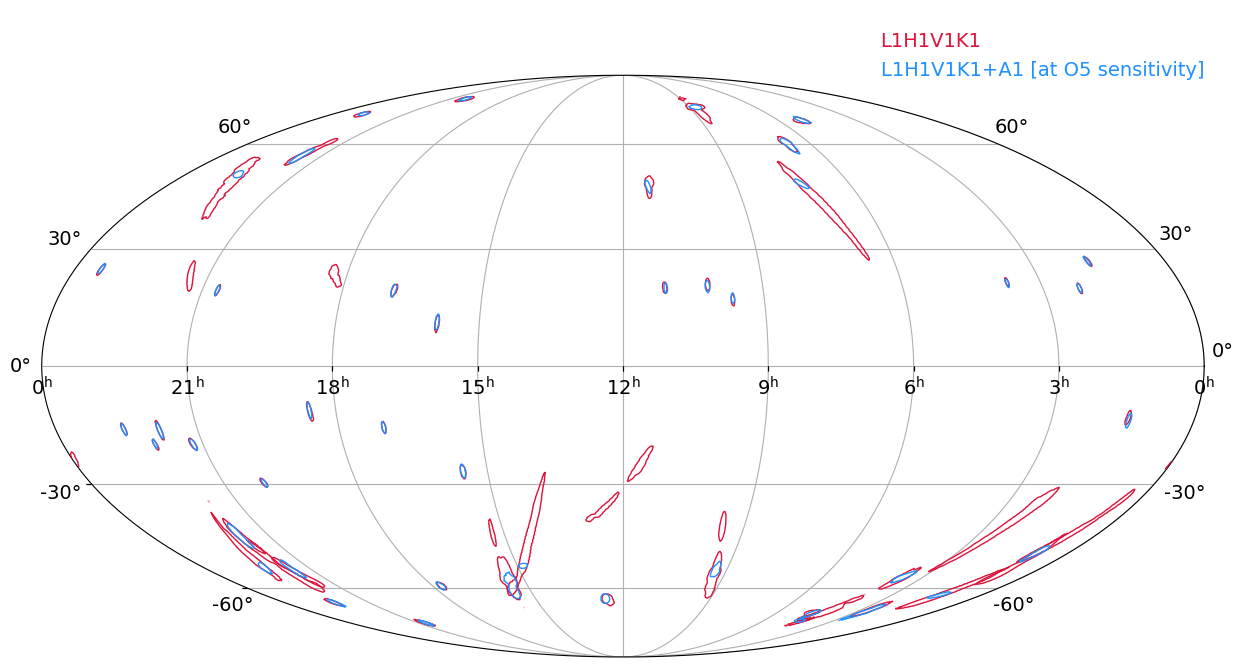

In [8]:
#-- ASTRO MOLLWEIDE PROJECTION --

plt.figure(figsize=(15,8))
fontsize = 14

#-- plotting arguments ----
axes_args = {}
axes_args['projection'] = 'astro hours'
axes_args['projection'] += ' ' + 'mollweide'

ax = plt.axes(**axes_args)
ax.grid()
ax.tick_params(which='both', labelsize=fontsize)

colors = ['dodgerblue', 'crimson']

#-- for LHVK -- (for  reference)
skymap_0 = {}
metadata_0 = {}
nside_0 = {}
text_0 = {}
vals_0 = {}
cs_0 = {}
deg2perpix_0 = {}
probperdeg_0 = {}

#-- for LHVKA --
skymap = {}
metadata = {}
nside = {}
text = {}
vals = {}
cs = {}
deg2perpix = {}
probperdeg = {}


levels = [90] # credible levels
pp = np.round([levels[0]])#.astype(int)
lw = 1.5

for idx in tqdm(sub_a0_O5_idx):
 
    skymap_0[idx], metadata_0[idx] =  fits.read_sky_map(os.getcwd() + '/LHVK_fits_files/injection_{}_skymap.fits.gz'.format(idx), nest=None)
    nside_0[idx] = ah.npix_to_nside(len(skymap_0[idx]))
    
    #--Convert sky map from probability to probability per square degree ---
    deg2perpix_0[idx] = ah.nside_to_pixel_area(nside_0[idx]).to_value(u.deg**2)
    probperdeg_0[idx] = skymap_0[idx] / deg2perpix_0[idx]
    
    vals_0[idx] = 100 * postprocess.find_greedy_credible_levels(skymap_0[idx])
    cs_0[idx] = ax.contour_hpx((vals_0[idx], 'ICRS'), nested=metadata_0[idx]['nest'], colors=colors[1], linewidths=1, levels=levels)



for idx in tqdm(sub_a0_O5_idx):
 
    skymap[idx], metadata[idx] =  fits.read_sky_map(os.getcwd() + '/LHVKA_fits_files/O5_run/injection_{}_skymap.fits.gz'.format(idx), nest=None)
    nside[idx] = ah.npix_to_nside(len(skymap[idx]))
    
    #--Convert sky map from probability to probability per square degree ---
    deg2perpix[idx] = ah.nside_to_pixel_area(nside[idx]).to_value(u.deg**2)
    probperdeg[idx] = skymap[idx] / deg2perpix[idx]
    
    vals[idx] = 100 * postprocess.find_greedy_credible_levels(skymap[idx])
    cs[idx] = ax.contour_hpx((vals[idx], 'ICRS'), nested=metadata[idx]['nest'], colors=colors[0], linewidths=1, levels=levels)
    

#-- putting legends on the skymaps ---
ax.text(0.808, 1.05, '\n'+'L1H1V1K1', transform=ax.transAxes, ha='right', color=colors[1], fontsize=fontsize)
ax.text(1.0, 1.0, '\n'+'L1H1V1K1+A1 [at O5 sensitivity]', transform=ax.transAxes, ha='right', color=colors[0], fontsize=fontsize)


plt.savefig("A1_at_O5_subthreshold_mollweide_final.png", dpi=200, bbox_inches='tight')
plt.show()